In [1]:
# Import packages
import pandas as pd
import os
import numpy as np

In [35]:
# Load data
local_df = pd.read_csv(os.path.join('../data', 'kitchenware_local_2000.csv'))
# local_df = local_df.drop(['shop_id', 'item_id', 'source', 'level2_global_be_category', 'total_sales'], axis=1)

cb_df = pd.read_csv(os.path.join('../data', 'kitchenware_CB_2000.csv'))
# cb_df = cb_df.drop(['shop_id', 'item_id', 'source', 'level2_global_be_category', 'total_sales'], axis=1)

In [36]:
quality_df = pd.concat([local_df, cb_df], ignore_index=True)
quality_df

,shop_id,item_id,source,total_sales,level2_global_be_category,product_title,price
0,306150209,4055643221,Local,879173,Kitchenware,CUSTOM KEMASAN MAKANAN STANDING POUCH,1350.0
1,201459146,3336005026,Local,659218,Kitchenware,Sarung tangan plastik merk Aquaglove,4350.0
2,326627098,5768843690,Local,505156,Kitchenware,GRATIS PLUG - Toples Plastik 200 ml KOTAK / To...,1250.0
3,14372935,483746005,Local,447070,Kitchenware,Standing Pouch Ziplock COLOR MATTE 14x23 cm,1016.0
4,31111113,736434154,Local,279833,Kitchenware,Souvenir pernikahan Centong nasi kamas paperpack,1600.0
...,...,...,...,...,...,...,...
3995,397334198,17145356072,Other CB,0,Kitchenware,Cetakan Fondant Bentuk Sepatu High Heels Stile...,190637.0
3996,244540014,14736258124,CNCB,0,Kitchenware,Doggtr Saringan Wastafel Dapur Sekali Pakai\n,143029.0
3997,972127273,23738429463,CNCB,0,Kitchenware,Tangki Penyimpanan Biji Kopi Vacuum One-Way Ex...,240084.0
3998,768896359,23201498931,CNCB,0,Kitchenware,Alat Pemeras Jeruk / Anggur manual Bahan stain...,140091.0


In [37]:
rating_df = pd.read_csv(os.path.join('../data', 'kitchenware_rating.csv'))
rating_quality_df = pd.merge(quality_df, rating_df, on='product_title', how='inner')
rating_quality_df

,shop_id,item_id,source,total_sales,level2_global_be_category,product_title,price,Relevance,Engagement,Fluency
0,56266064,15552102362,Local,135816,Kitchenware,Toples Tempat Bumbu Dapur Set Aesthetic Free L...,3500.0,3,4,4
1,261759303,4933714854,Local,22806,Kitchenware,Toples Tempat Bumbu Dapur Set Aesthetic Free L...,2500.0,3,4,4
2,95334941,3562788479,Local,37421,Kitchenware,[READY JAKARTA] PISAU BUAH STAINLESS STEEL PIS...,2200.0,2,3,3
3,105779336,8280851855,Local,18333,Kitchenware,[READY JAKARTA] PISAU BUAH STAINLESS STEEL PIS...,2200.0,2,3,3
4,217786736,5614494393,Local,24530,Kitchenware,10pcs Tutup Pop Up Botol ASI ASIP Baru - UC 10...,4000.0,4,3,3
...,...,...,...,...,...,...,...,...,...,...
502,165465721,11782157175,CNCB,1,Kitchenware,(CYS) DIY Fern Leaf Silicone Cake Mold Kitchen...,26755.0,2,1,1
503,102131100,22515362709,CNCB,1,Kitchenware,Panci Pengaduk Telur Kue Multi-Fungsional Kapa...,165332.0,2,3,2
504,296653576,7688408216,CNCB,1,Kitchenware,Refraktometer Alat Ukur Kelembaban Madu Multif...,216346.0,3,2,2
505,135047408,11702763760,CNCB,1,Kitchenware,3pcs / Set Alat Sendok Jarum Untuk Membuat Per...,29956.0,3,3,3


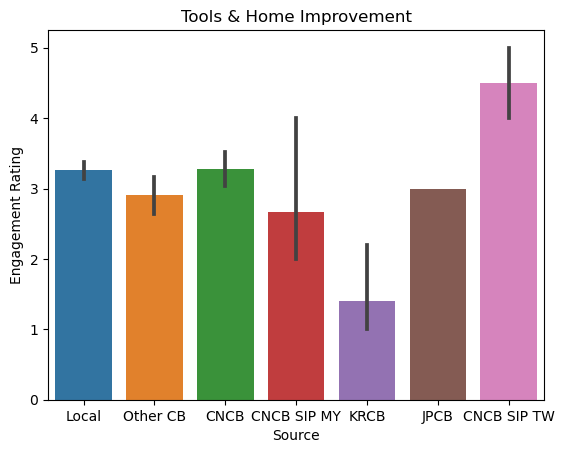

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the comparison using seaborn
# rating_quality_df['source'] = rating_quality_df['source'].replace(['Other CB', 'CNCB', 'CNCB SIP TW', 'CNCB SIP MY'], 'CB')
sns.barplot(data=rating_quality_df, x='source', y='Relevance')

# Set labels and title
plt.xlabel('Source')
plt.ylabel('Engagement Rating')
plt.title('Tools & Home Improvement')

# Show the plot
plt.show()